In [70]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context('notebook', font_scale = 1)
sns.set_palette("colorblind")

In [64]:
#initial conditions

def stochastic (iterations):
    f = 0
    Ss = []
    Is = []
    Ts = []
    
    while f<iterations:
        beta=3e-4 #force of infection
        gamma=0.1  #recovery rate
        mu=0.01 #birth/death rate
        N=1000 #population size
        tend = 1000

        n0=[N-10,10,0]
        n=n0
        st=n
        nu=[[1,0,0],[-1,0,0],[0,-1,0],[0,0,-1],[-1,1,0],[0,-1,1]]
        t=0

        st = []
        tt = []
        i = 0
        while t<tend:
            r=[mu*N,mu*n[0],mu*n[1],mu*n[2],beta*n[0]*n[1],gamma*n[1]]

            r0=sum(r)

            rr=[j/r0 for j in r]

            s=np.random.rand(2,1)

            tau=(np.log(1/s[0]))/r0

            rs=np.cumsum(rr)

            rn=np.sum(rs<s[1])+1

            n = [sum(pair) for pair in zip(n, nu[rn-1])]

            t= t + tau

            st.append(n)
            tt.append(t)
            i += 1
        S = [st[i][0] for i in range(len(st[:]))]
        I = [st[i][1] for i in range(len(st[:]))]
        Ss.append(S)
        Is.append(I)
        Ts.append(tt)
        f += 1
        
    return [Ss, Is, Ts]

In [68]:
repeats = 4
results = stochastic(repeats)

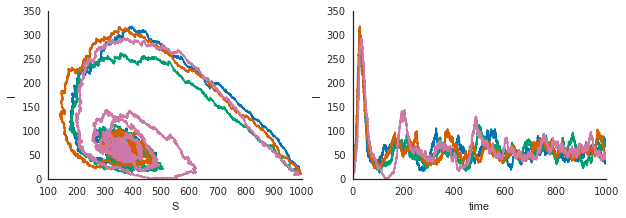

In [71]:
fig = plt.figure(figsize = (10, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
for i in range(0, repeats):
    Sval = results[0][i]
    Ival = results[1][i]
    time= results[2][i]
    ax1.plot(Sval, Ival)
    ax1.set_xlabel('S')
    ax1.set_ylabel('I')
    ax2.set_xlim(0,1000)
    ax2.set_xlabel('time')
    ax2.set_ylabel('I')
    ax2.plot(time, Ival)
    sns.despine()